In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
import os

In [19]:
import keras
keras.__version__
from tensorflow.keras.utils import normalize
import numpy as np
from matplotlib import pyplot as plt
import glob
import cv2
import os
from keras import backend as K
import tensorflow as tf

In [20]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [21]:
import keras
keras.__version__

'2.5.0'

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Flatten, MaxPooling2D

In [23]:
from datetime import datetime
from sklearn import metrics

<br/><br/>
# Data Preprocessing

In [52]:
SIZE = 512
DIR = "medium_brain/"
print(os.listdir("medium_brain/"))

['all_images', 'all_labels', 'test_images', 'test_labels']


In [53]:
train_images = []

for directory_path in glob.glob(DIR + "all_images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        print(img_path)

medium_brain/all_images\P025.png
medium_brain/all_images\P026.png
medium_brain/all_images\P027.png
medium_brain/all_images\P029.png
medium_brain/all_images\P030.png
medium_brain/all_images\P031.png
medium_brain/all_images\P032.png
medium_brain/all_images\P033.png
medium_brain/all_images\P034.png
medium_brain/all_images\P035.png
medium_brain/all_images\P036.png
medium_brain/all_images\P037.png
medium_brain/all_images\P038.png
medium_brain/all_images\P039.png
medium_brain/all_images\P040.png
medium_brain/all_images\P041.png
medium_brain/all_images\P043.png
medium_brain/all_images\P044.png
medium_brain/all_images\P045.png
medium_brain/all_images\P046.png
medium_brain/all_images\P047.png
medium_brain/all_images\P048.png
medium_brain/all_images\P050.png
medium_brain/all_images\P051.png
medium_brain/all_images\P052.png
medium_brain/all_images\P054.png
medium_brain/all_images\P055.png
medium_brain/all_images\P056.png
medium_brain/all_images\P057.png
medium_brain/all_images\P058.png
medium_bra

In [54]:
train_masks = []

for directory_path in glob.glob(DIR + "all_labels"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)
        mask = cv2.resize(mask, (SIZE, SIZE), interpolation = cv2.INTER_NEAREST)
        train_masks.append(mask)
        print(mask_path)

medium_brain/all_labels\P025.png
medium_brain/all_labels\P026.png
medium_brain/all_labels\P027.png
medium_brain/all_labels\P029.png
medium_brain/all_labels\P030.png
medium_brain/all_labels\P031.png
medium_brain/all_labels\P032.png
medium_brain/all_labels\P033.png
medium_brain/all_labels\P034.png
medium_brain/all_labels\P035.png
medium_brain/all_labels\P036.png
medium_brain/all_labels\P037.png
medium_brain/all_labels\P038.png
medium_brain/all_labels\P039.png
medium_brain/all_labels\P040.png
medium_brain/all_labels\P041.png
medium_brain/all_labels\P043.png
medium_brain/all_labels\P044.png
medium_brain/all_labels\P045.png
medium_brain/all_labels\P046.png
medium_brain/all_labels\P047.png
medium_brain/all_labels\P048.png
medium_brain/all_labels\P050.png
medium_brain/all_labels\P051.png
medium_brain/all_labels\P052.png
medium_brain/all_labels\P054.png
medium_brain/all_labels\P055.png
medium_brain/all_labels\P056.png
medium_brain/all_labels\P057.png
medium_brain/all_labels\P058.png
medium_bra

In [55]:
train_images = np.array(train_images)
train_masks = np.array(train_masks)

In [56]:
np.unique(train_masks)

array([  0, 128, 255], dtype=uint8)

In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1, 1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

C:\Users\alif-\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [58]:
train_masks = train_masks_encoded_original_shape

In [59]:
np.unique(train_masks)

array([0, 1, 2], dtype=int64)

In [60]:
print(train_images.shape)
print(train_masks.shape)

(49, 512, 512, 3)
(49, 512, 512)


In [61]:
X_train = train_images
y_train = train_masks
y_train = np.expand_dims(y_train, axis=3)

In [62]:
print(X_train.shape)
print(y_train.shape)

(49, 512, 512, 3)
(49, 512, 512, 1)


### Convolutional Layers

In [63]:
activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation=activation, 
        padding='same', input_shape=(SIZE, SIZE, 3)))
feature_extractor.add(Conv2D(32, 3, activation=activation, 
        padding='same', kernel_initializer='he_uniform'))
# feature_extractor.add(Conv2D(64, 3, activation=activation, 
#         padding='same', kernel_initializer='he_uniform'))
# feature_extractor.add(BatchNormalization())
# feature_extractor.add(Conv2D(64, 3, activation=activation, 
#         padding='same', kernel_initializer='he_uniform'))
# feature_extractor.add(BatchNormalization())
# feature_extractor.add(MaxPooling2D())
# feature_extractor.add(Flatten())

In [64]:
X = feature_extractor.predict(X_train)

In [37]:
# X = np.moveaxis(X, 0, 1)

In [65]:
X = X.reshape(-1, X.shape[3])
Y = y_train.reshape(-1)

In [66]:
print(X.shape)
print(Y.shape)

(12845056, 32)
(12845056,)


In [67]:
dataset = pd.DataFrame(X)
dataset['Label'] = Y
print(dataset['Label'].unique())

[0 2 1]


In [68]:
print(dataset['Label'].value_counts())

0    12697585
2       89292
1       58179
Name: Label, dtype: int64


In [42]:
# dataset = dataset[dataset['Label'] != 0]

In [69]:
X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']

<br/><br/>
# First Pass

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [96]:
%%time
model.fit(X_for_RF, Y_for_RF)

Wall time: 4min 26s


RandomForestClassifier(n_estimators=50, random_state=42)

In [97]:
filename = 'rf_conv_BASELINE_50est_8img.sav'

In [98]:
pickle.dump(model, open(filename, 'wb'))

### Predict

In [10]:
loaded_model = pickle.load(open(filename, 'rb'))

In [68]:
test_fname = 'P044'
test_format = '.png'

In [69]:
test_img_path = DIR + 'test_images/' + test_fname + test_format
test_img = cv2.imread(test_img_path, cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (SIZE, SIZE))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

In [70]:
X_test_features = feature_extractor.predict(test_img)
X_test_features = X_test_features.reshape(-1, X_test_features.shape[3])

In [71]:
X_test_features.shape

(262144, 32)

In [72]:
prediction = loaded_model.predict(X_test_features)

In [73]:
# Reshape and save prediction
prediction_image = prediction.reshape(mask.shape)
plt.imsave("rf_multi_conv/predicted/" + test_fname + test_format, prediction_image, cmap="binary")

In [74]:
true_mask_path = DIR + 'test_labels/' + test_fname + test_format
true_mask = cv2.imread(mask_path, 0)
true_mask = cv2.resize(mask, (SIZE, SIZE), interpolation = cv2.INTER_NEAREST)

In [76]:
true_mask.shape

(512, 512)

In [78]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
h, w = true_mask.shape
true_mask_reshaped = true_mask.reshape(-1, 1)
true_mask_reshaped_encoded = labelencoder.fit_transform(true_mask_reshaped)
true_mask_encoded_original_shape = true_mask_reshaped_encoded.reshape(h, w)

In [79]:
true_mask = true_mask_reshaped_encoded

In [80]:
np.unique(true_mask)

array([0, 1, 2], dtype=int64)

In [81]:
true_mask = true_mask.reshape(-1)

In [82]:
print(true_mask.shape)
print(prediction.shape)

(262144,)
(262144,)


In [83]:
print(metrics.accuracy_score(true_mask, prediction))

0.9827651977539062


### Jaccard

In [84]:
# IOU for each class is the following
# IOU = true_pos / (true_pos + false_pos + false_neg)

In [85]:
jaccard_score = metrics.jaccard_score(true_mask, prediction, average='macro')
print(jaccard_score)

0.32758839925130206


### IOU

In [86]:
tf.keras.metrics.MeanIoU

tensorflow.python.keras.metrics.MeanIoU

In [87]:
print(true_mask.shape)
print(prediction.shape)

(262144,)
(262144,)


In [88]:
print(np.unique(true_mask))
print(np.unique(prediction))

[0 1 2]
[0]


In [89]:
# from keras.metrics import MeanIOU
num_classes = 3
IOU_RF = tf.keras.metrics.MeanIoU(num_classes=num_classes)
IOU_RF.update_state(true_mask, prediction)
print(IOU_RF.result().numpy())

0.3275884


In [90]:
values = np.array(IOU_RF.get_weights()).reshape(num_classes, num_classes)
print(values)

[[257626.      0.      0.]
 [  1390.      0.      0.]
 [  3128.      0.      0.]]


In [91]:
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2]  + values[1,0]+ values[2,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2]  + values[0,1]+ values[2,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[0,2]+ values[1,2])

In [92]:
print("IoU for class 1 is: ", class1_IoU)
print("IoU for class 2 is: ", class2_IoU)
print("IoU for class 3 is: ", class3_IoU)

IoU for class 1 is:  0.9827652
IoU for class 2 is:  0.0
IoU for class 3 is:  0.0


<br/><br/>
# Class Balancing

In [27]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2], dtype=int64),
 array([4146224,   18058,   30022], dtype=int64))

In [32]:
classes = train_masks.reshape(-1)

In [34]:
np.unique(classes)

array([0, 1, 2], dtype=int64)

In [35]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 classes)
print("Class weights are: ", class_weights)

Class weights are:  [ 0.3371987  77.42282276 46.56922701]


C:\Users\alif-\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [42]:
my_weights = {0:0.3, 1:70, 2:40}

In [43]:
RF_balanced = RandomForestClassifier(n_estimators=50,
                                    class_weight=my_weights,
                                    #class_weight=balanced,
                                    random_state=42)

In [44]:
%%time
RF_balanced.fit(X_for_RF, Y_for_RF)

Wall time: 10min 16s


RandomForestClassifier(class_weight={0: 0.3, 1: 70, 2: 40}, n_estimators=50,
                       random_state=42)

In [47]:
filename = 'rf_conv_50est_16img_balanced.sav'
pickle.dump(RF_balanced, open(filename, 'wb'))

In [51]:
loaded_model = pickle.load(open(filename, 'rb'))

test_fname = 'P054'
test_format = '.png'

test_img_path = DIR + 'test_images/' + test_fname + test_format
test_img = cv2.imread(test_img_path, cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (SIZE, SIZE))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

X_test_features = feature_extractor.predict(test_img)
X_test_features = X_test_features.reshape(-1, X_test_features.shape[3])

prediction = loaded_model.predict(X_test_features)

# Reshape and save prediction
prediction_image = prediction.reshape(mask.shape)
plt.imsave("rf_multi_conv/predicted/" + test_fname + test_format, prediction_image, cmap="binary")

true_mask_path = DIR + 'test_labels/' + test_fname + test_format
true_mask = cv2.imread(mask_path, 0)
true_mask = cv2.resize(mask, (SIZE, SIZE), interpolation = cv2.INTER_NEAREST)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
h, w = true_mask.shape
true_mask_reshaped = true_mask.reshape(-1, 1)
true_mask_reshaped_encoded = labelencoder.fit_transform(true_mask_reshaped)
true_mask_encoded_original_shape = true_mask_reshaped_encoded.reshape(h, w)

true_mask = true_mask_reshaped_encoded
true_mask = true_mask.reshape(-1)


C:\Users\alif-\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [52]:
print("Accuracy: ", metrics.accuracy_score(true_mask, prediction))

jaccard_score = metrics.jaccard_score(true_mask, prediction, average='macro')
print("Jaccard score: ", jaccard_score)

Accuracy:  0.9822463989257812
Jaccard score:  0.32741546630859375


In [63]:
# from keras.metrics import MeanIOU
num_classes = 3
IOU_RF = tf.keras.metrics.MeanIoU(num_classes=num_classes)
IOU_RF.update_state(true_mask, prediction)
print(IOU_RF.result().numpy())

values = np.array(IOU_RF.get_weights()).reshape(num_classes, num_classes)
# print(values)

class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2]  + values[1,0]+ values[2,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2]  + values[0,1]+ values[2,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[0,2]+ values[1,2])

print("IoU for class 0 is: ", class1_IoU)
print("IoU for class 1 is: ", class2_IoU)
print("IoU for class 2 is: ", class3_IoU)

0.32741547
IoU for class 0 is:  0.9822464
IoU for class 1 is:  0.0
IoU for class 2 is:  0.0


### Self Balancing

In [101]:
from sklearn.utils import resample
print(dataset["Label"].unique())
print(dataset["Label"].value_counts())

[0 2 1]
0    2080558
2      11007
1       5587
Name: Label, dtype: int64


In [102]:
dataset0 = dataset[dataset["Label"] == 0]
dataset1 = dataset[dataset["Label"] == 1]
dataset2 = dataset[dataset["Label"] == 2]

In [103]:
dataset0.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
0,0.637308,0.359698,0.535121,0.539144,0.532174,0.667340,0.575968,0.560967,0.618551,0.482497,...,0.489602,0.484235,0.737842,0.638967,0.297107,0.532817,0.538170,0.500644,0.580960,0
1,0.697716,0.343823,0.504300,0.585394,0.568609,0.641029,0.444371,0.581441,0.479256,0.540742,...,0.463248,0.646338,0.714639,0.599419,0.279111,0.491879,0.490748,0.454592,0.486876,0
2,0.697716,0.343823,0.504300,0.585394,0.568609,0.641029,0.444371,0.581441,0.479256,0.540742,...,0.463248,0.646338,0.714639,0.599419,0.279111,0.491879,0.490748,0.454592,0.486876,0
3,0.697716,0.343823,0.504300,0.585394,0.568609,0.641029,0.444371,0.581441,0.479256,0.540742,...,0.463248,0.646338,0.714639,0.599419,0.279111,0.491879,0.490748,0.454592,0.486876,0
4,0.697716,0.343823,0.504300,0.585394,0.568609,0.641029,0.444371,0.581441,0.479256,0.540742,...,0.463248,0.646338,0.714639,0.599419,0.279111,0.491879,0.490748,0.454592,0.486876,0


In [104]:
df0 = resample(dataset0, replace=True, n_samples=10000, random_state=42)
df1 = resample(dataset1, replace=True, n_samples=10000, random_state=42)
df2 = resample(dataset2, replace=True, n_samples=10000, random_state=42)

In [105]:
dataset_resampled = pd.concat([df0, df1, df2])
print(dataset_resampled['Label'].value_counts())

0    10000
1    10000
2    10000
Name: Label, dtype: int64


In [106]:
X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']

In [107]:
from sklearn.ensemble import RandomForestClassifier
RF_hand_balanced = RandomForestClassifier(n_estimators=50, random_state=42)

In [108]:
%%time
RF_hand_balanced.fit(X_for_RF, Y_for_RF)

Wall time: 4min 31s


RandomForestClassifier(n_estimators=50, random_state=42)

### SMOTE
Synthetic minority over-sampling technique.

In [74]:
print(train_images.shape)
print(train_masks.shape)

(49, 512, 512, 3)
(49, 512, 512)


In [70]:
print(X_for_RF.shape)
print(Y_for_RF.shape)

(12845056, 32)
(12845056,)


In [75]:
import imblearn
from imblearn.over_sampling import SMOTE, ADASYN
X_for_RF, Y_for_RF = SMOTE(random_state=42).fit_resample(X_for_RF, Y_for_RF)

In [76]:
from sklearn.ensemble import RandomForestClassifier
RF_SMOTE_model = RandomForestClassifier(n_estimators=50, random_state=42)

In [77]:
%%time
RF_SMOTE_model.fit(X_for_RF, Y_for_RF)

Wall time: 7h 36min 49s


RandomForestClassifier(n_estimators=50, random_state=42)

<br/><br/>
# Save Model & Predict
**Important**: Be sure to change the _test_prefix_ variable to describe the test you're currently running.

In [78]:
test_prefix = 'rf_conv_50est_49img_SMOTE'
filename = test_prefix + '.sav'
pickle.dump(RF_SMOTE_model, open(filename, 'wb'))

In [146]:
loaded_model = pickle.load(open(filename, 'rb'))
test_fname = 'P097'
test_format = '.png'

test_img_path = DIR + 'test_images/' + test_fname + test_format
test_img = cv2.imread(test_img_path, cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (SIZE, SIZE))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

X_test_features = feature_extractor.predict(test_img)
X_test_features = X_test_features.reshape(-1, X_test_features.shape[3])

prediction = loaded_model.predict(X_test_features)

# Reshape and save prediction
prediction_image = prediction.reshape(mask.shape)
plt.imsave("rf_multi_conv/predicted/" + test_prefix + '_' + test_fname + test_format, prediction_image, cmap="turbo")

true_mask_path = DIR + 'test_labels/' + test_fname + test_format
true_mask = cv2.imread(true_mask_path, 0)
true_mask = cv2.resize(true_mask, (SIZE, SIZE), interpolation = cv2.INTER_NEAREST)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
h, w = true_mask.shape
true_mask_reshaped = true_mask.reshape(-1, 1)
true_mask_reshaped_encoded = labelencoder.fit_transform(true_mask_reshaped)
true_mask_encoded_original_shape = true_mask_reshaped_encoded.reshape(h, w)

true_mask = true_mask_reshaped_encoded
true_mask = true_mask.reshape(-1)


C:\Users\alif-\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Performance Metrics

In [147]:
print(prediction.shape)
print(true_mask.shape)

(262144,)
(262144,)


In [148]:
unique, counts = np.unique(prediction, return_counts=True)
pred_counts = dict(zip(unique, counts))

unique, counts = np.unique(true_mask, return_counts=True)
label_counts = dict(zip(unique, counts))

print(pred_counts)
print(label_counts)

{0: 255644, 1: 2630, 2: 3870}
{0: 257537, 1: 2338, 2: 2269}


medium_brain/test_labels/P091.png


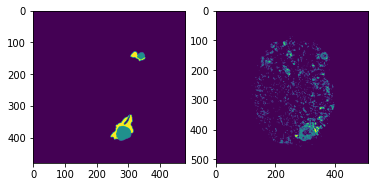

In [149]:
print(label_path)
# label_path = DIR + 'test_labels/' + test_fname + test_format
label_path = DIR + 'test_labels/' + test_fname + test_format
label_img = cv2.imread(label_path, 0)

# plt.subplots(1,2)
# plt.imshow(label_img)
# plt.imshow(prediction_image)
# plt.show()

fig, ax = plt.subplots(1,2)
ax[0].imshow(label_img);
ax[1].imshow(prediction_image);

In [150]:
print("Accuracy: ", metrics.accuracy_score(true_mask, prediction))

jaccard_score = metrics.jaccard_score(true_mask, prediction, average='macro')
print("Jaccard score: ", jaccard_score)

# from keras.metrics import MeanIOU
num_classes = 3
IOU_RF = tf.keras.metrics.MeanIoU(num_classes=num_classes)
IOU_RF.update_state(true_mask, prediction)
print("Mean IOU: ", IOU_RF.result().numpy())

values = np.array(IOU_RF.get_weights()).reshape(num_classes, num_classes)
# print(values)

class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2]  + values[1,0]+ values[2,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2]  + values[0,1]+ values[2,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[0,2]+ values[1,2])

print("IoU for class 0 is: ", class1_IoU)
print("IoU for class 1 is: ", class2_IoU)
print("IoU for class 2 is: ", class3_IoU)

Accuracy:  0.9729537963867188
Jaccard score:  0.4886822775841166
Mean IOU:  0.48868227
IoU for class 0 is:  0.97327214
IoU for class 1 is:  0.40062025
IoU for class 2 is:  0.09215442
